## DATA TRAINING & TESTING

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Read the CSV file into a DataFrame
file_path = r"C:\SECB3203 PROJECT\alzheimer_dataset.csv"
df = pd.read_csv(file_path)

In [36]:
# Assuming 'Group' is your target variable
target_variable = 'Group'

# Create a binary classification target variable
df['BinaryGroup'] = df[target_variable].apply(lambda x: 1 if x in ['Demented', 'Converted'] else 0)

# Separate features and target variable
X = df.drop([target_variable, 'BinaryGroup'], axis=1)
y = df['BinaryGroup']

# Convert non-numerical categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
for column in X.select_dtypes(include='object').columns:
    X[column] = label_encoder.fit_transform(X[column])

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### METHOD 1 : INFORMATION GAIN


Results for Information Gain selected features on Training Set:
Selected Features: 4    MMSE
5     CDR
7    nWBV
Name: Feature, dtype: object
Accuracy on Training Set: 0.9429530201342282
Precision on Training Set: 0.9429498315998334
Recall on Training Set: 0.9429530201342282
F1-score on Training Set: 0.9429407648667968


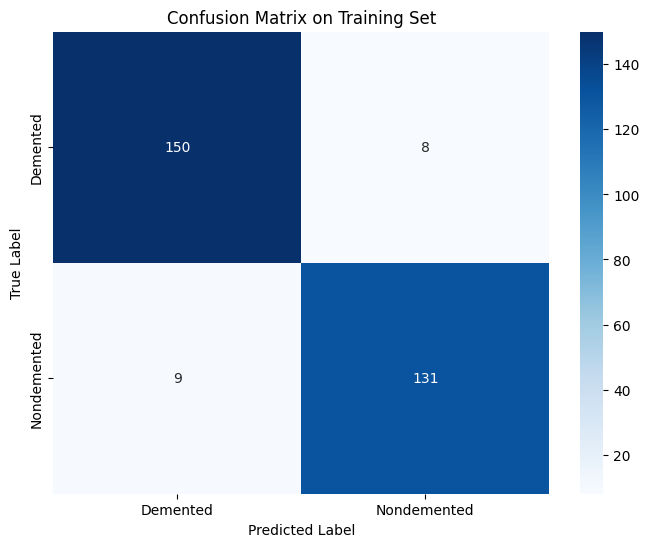

In [41]:
# Feature selection using Information Gain
info_gain = mutual_info_classif(X_train, y_train)
info_gain_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gain})
selected_features_info_gain = info_gain_df[info_gain_df['Information Gain'] > 0.1]['Feature']

# Train Random Forest Classifier with cross-validation for Information Gain selected features
rf_classifier_info_gain = RandomForestClassifier(random_state=42)

# Use cross_val_predict to get predicted labels during cross-validation
y_pred_info_gain_cv = cross_val_predict(rf_classifier_info_gain, X_train[selected_features_info_gain], y_train, cv=5)

# Calculate accuracy, precision, recall, and F1-score on the training set
accuracy_info_gain = accuracy_score(y_train, y_pred_info_gain_cv)
precision_info_gain = precision_score(y_train, y_pred_info_gain_cv, average='weighted')
recall_info_gain = recall_score(y_train, y_pred_info_gain_cv, average='weighted')
f1_info_gain = f1_score(y_train, y_pred_info_gain_cv, average='weighted')

# Compute confusion matrix on the training set
conf_matrix_info_gain_train = confusion_matrix(y_train, y_pred_info_gain_cv)

# Print results on the training set
print("\nResults for Information Gain selected features on Training Set:")
print("Selected Features:", selected_features_info_gain)
print("Accuracy on Training Set:", accuracy_info_gain)
print("Precision on Training Set:", precision_info_gain)
print("Recall on Training Set:", recall_info_gain)
print("F1-score on Training Set:", f1_info_gain)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_info_gain_train, annot=True, fmt="d", cmap="Blues", xticklabels=['Demented', 'Nondemented'], yticklabels=['Demented', 'Nondemented'])
plt.title('Confusion Matrix on Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Results for Information Gain selected features on Test Set:
Selected Features: 4    MMSE
5     CDR
7    nWBV
Name: Feature, dtype: object
Accuracy on Test Set: 0.8666666666666667
Precision on Test Set: 0.872934472934473
Recall on Test Set: 0.8666666666666667
F1-score on Test Set: 0.8673362027737924


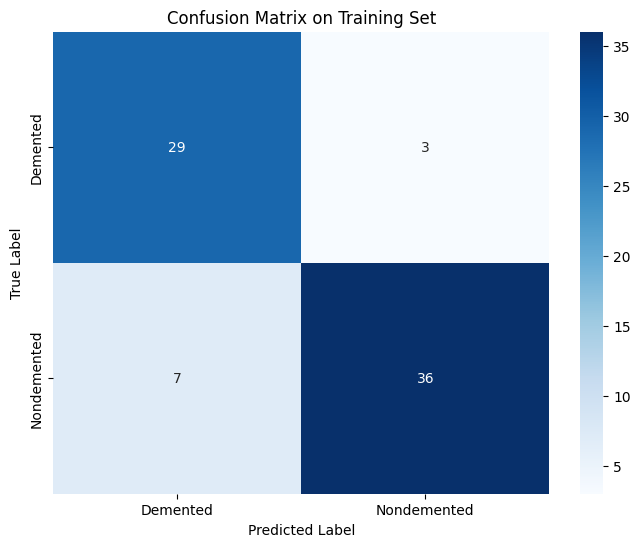

In [42]:
# Test the model on the separate test set
y_pred_test_info_gain = rf_classifier_info_gain.fit(X_train[selected_features_info_gain], y_train).predict(X_test[selected_features_info_gain])

# Calculate accuracy, precision, recall, and F1-score on the test set
accuracy_test_info_gain = accuracy_score(y_test, y_pred_test_info_gain)
precision_test_info_gain = precision_score(y_test, y_pred_test_info_gain, average='weighted')
recall_test_info_gain = recall_score(y_test, y_pred_test_info_gain, average='weighted')
f1_test_info_gain = f1_score(y_test, y_pred_test_info_gain, average='weighted')

# Compute confusion matrix on the test set
conf_matrix_info_gain_test = confusion_matrix(y_test, y_pred_test_info_gain)

# Print results on the test set
print("\nResults for Information Gain selected features on Test Set:")
print("Selected Features:", selected_features_info_gain)
print("Accuracy on Test Set:", accuracy_test_info_gain)
print("Precision on Test Set:", precision_test_info_gain)
print("Recall on Test Set:", recall_test_info_gain)
print("F1-score on Test Set:", f1_test_info_gain)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_info_gain_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Demented', 'Nondemented'], yticklabels=['Demented', 'Nondemented'])
plt.title('Confusion Matrix on Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### METHOD 2 : CHI-SQUARE


Results for Chi-Square selected features on Training Set:
Selected Features: 0     M/F
2    EDUC
4    MMSE
5     CDR
Name: Feature, dtype: object
Accuracy on Training Set: 0.9530201342281879
Precision on Training Set: 0.9541889338929849
Recall on Training Set: 0.9530201342281879
F1-score on Training Set: 0.9529092521920525


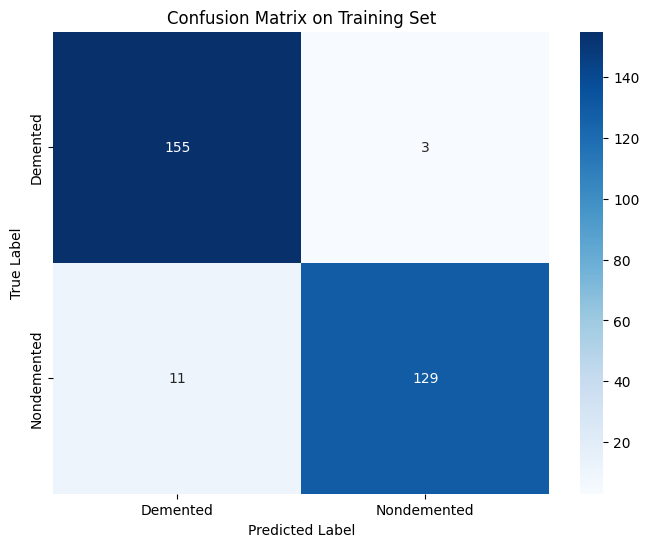

In [44]:
# Feature selection using Chi-Square
chi2_stat, p_values = chi2(X_train, y_train)
chi2_df = pd.DataFrame({'Feature': X.columns, 'Chi2_Statistic': chi2_stat, 'P-Value': p_values})
selected_features_chi2 = chi2_df[chi2_df['P-Value'] < 0.05]['Feature']

# Train Random Forest Classifier with cross-validation for Chi-Square selected features
rf_classifier_chi2 = RandomForestClassifier(random_state=42)

# Use cross_val_predict to get predicted labels during cross-validation
y_pred_chi2_cv = cross_val_predict(rf_classifier_chi2, X_train[selected_features_chi2], y_train, cv=5)

# Calculate accuracy, precision, recall, and F1-score on the training set
accuracy_chi2 = accuracy_score(y_train, y_pred_chi2_cv)
precision_chi2 = precision_score(y_train, y_pred_chi2_cv, average='weighted')
recall_chi2 = recall_score(y_train, y_pred_chi2_cv, average='weighted')
f1_chi2 = f1_score(y_train, y_pred_chi2_cv, average='weighted')

# Compute confusion matrix on the training set
conf_matrix_chi2_train = confusion_matrix(y_train, y_pred_chi2_cv)

# Print results on the training set
print("\nResults for Chi-Square selected features on Training Set:")
print("Selected Features:", selected_features_chi2)
print("Accuracy on Training Set:", accuracy_chi2)
print("Precision on Training Set:", precision_chi2)
print("Recall on Training Set:", recall_chi2)
print("F1-score on Training Set:", f1_chi2)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_chi2_train, annot=True, fmt="d", cmap="Blues", xticklabels=['Demented', 'Nondemented'], yticklabels=['Demented', 'Nondemented'])
plt.title('Confusion Matrix on Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



Results for Chi-Square selected features on Test Set:
Selected Features: 0     M/F
2    EDUC
4    MMSE
5     CDR
Name: Feature, dtype: object
Accuracy on Test Set: 0.88
Precision on Test Set: 0.8965527065527065
Recall on Test Set: 0.88
F1-score on Test Set: 0.880599037261544


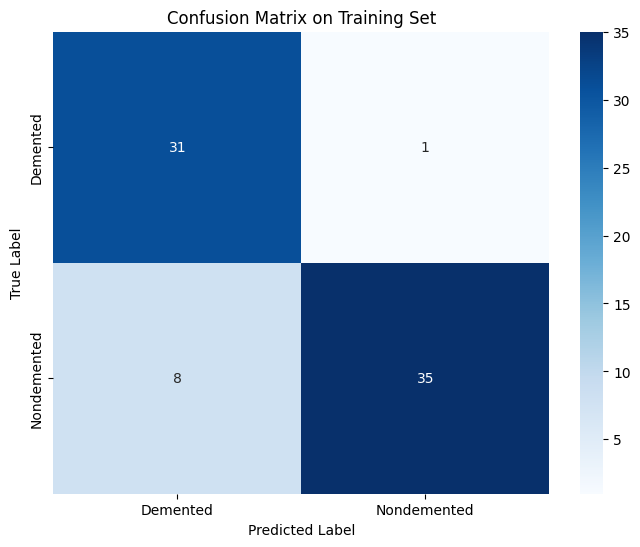

In [45]:
# Test the model on the separate test set
y_pred_test_chi2 = rf_classifier_chi2.fit(X_train[selected_features_chi2], y_train).predict(X_test[selected_features_chi2])

# Calculate accuracy, precision, recall, and F1-score on the test set
accuracy_test_chi2 = accuracy_score(y_test, y_pred_test_chi2)
precision_test_chi2 = precision_score(y_test, y_pred_test_chi2, average='weighted')
recall_test_chi2 = recall_score(y_test, y_pred_test_chi2, average='weighted')
f1_test_chi2 = f1_score(y_test, y_pred_test_chi2, average='weighted')

# Compute confusion matrix on the training set
conf_matrix_chi2_test = confusion_matrix(y_test, y_pred_test_chi2)

# Print results on the test set
print("\nResults for Chi-Square selected features on Test Set:")
print("Selected Features:", selected_features_chi2)
print("Accuracy on Test Set:", accuracy_test_chi2)
print("Precision on Test Set:", precision_test_chi2)
print("Recall on Test Set:", recall_test_chi2)
print("F1-score on Test Set:", f1_test_chi2)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_chi2_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Demented', 'Nondemented'], yticklabels=['Demented', 'Nondemented'])
plt.title('Confusion Matrix on Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### METHOD 3 : CORRELATION COEFFICIENT


Results for Correlation Coefficient selected features on Training Set:
Selected Features: ['M/F', 'MMSE', 'Age', 'EDUC']
Accuracy on Training Set: 0.7248322147651006
Precision on Training Set: 0.7246486236747398
Recall on Training Set: 0.7248322147651006
F1-score on Training Set: 0.7247077100887355


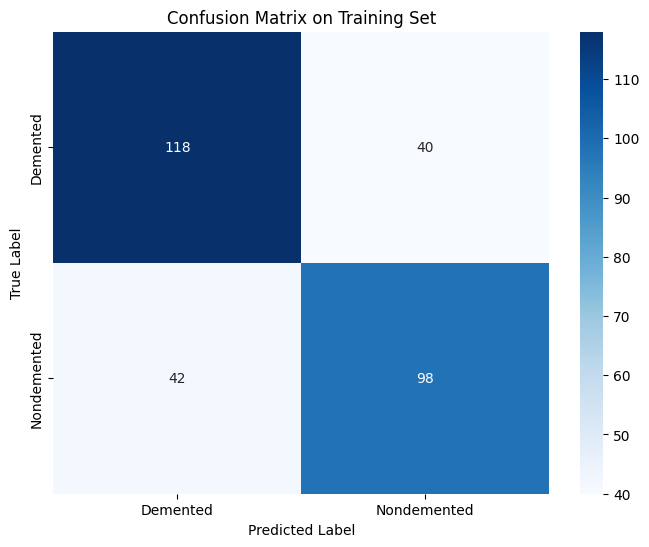

In [46]:
# Feature selection using Correlation Coefficient
correlation_matrix = X_train.corr()
correlation_threshold = 0.5
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)
selected_features_correlation = list(set(X.columns) - highly_correlated_features)

# Train Random Forest Classifier with cross-validation for Correlation Coefficient selected features
rf_classifier_correlation = RandomForestClassifier(random_state=42)

# Use cross_val_predict to get predicted labels during cross-validation
y_pred_correlation_cv = cross_val_predict(rf_classifier_correlation, X_train[selected_features_correlation], y_train, cv=5)

# Fit the model on the entire training set
rf_classifier_correlation.fit(X_train[selected_features_correlation], y_train)

# Calculate accuracy, precision, recall, and F1-score on the training set
accuracy_train = accuracy_score(y_train, y_pred_correlation_cv)
precision_train = precision_score(y_train, y_pred_correlation_cv, average='weighted')
recall_train = recall_score(y_train, y_pred_correlation_cv, average='weighted')
f1_train = f1_score(y_train, y_pred_correlation_cv, average='weighted')

# Compute confusion matrix on the training set
conf_matrix_corr_train = confusion_matrix(y_train, y_pred_correlation_cv)

# Print results on the training set
print("\nResults for Correlation Coefficient selected features on Training Set:")
print("Selected Features:", selected_features_correlation)
print("Accuracy on Training Set:", accuracy_train)
print("Precision on Training Set:", precision_train)
print("Recall on Training Set:", recall_train)
print("F1-score on Training Set:", f1_train)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_corr_train, annot=True, fmt="d", cmap="Blues", xticklabels=['Demented', 'Nondemented'], yticklabels=['Demented', 'Nondemented'])
plt.title('Confusion Matrix on Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Results on Test Set:
Accuracy on Test Set: 0.68
Precision on Test Set: 0.6982857142857142
Recall on Test Set: 0.68
F1-score on Test Set: 0.6813675213675213


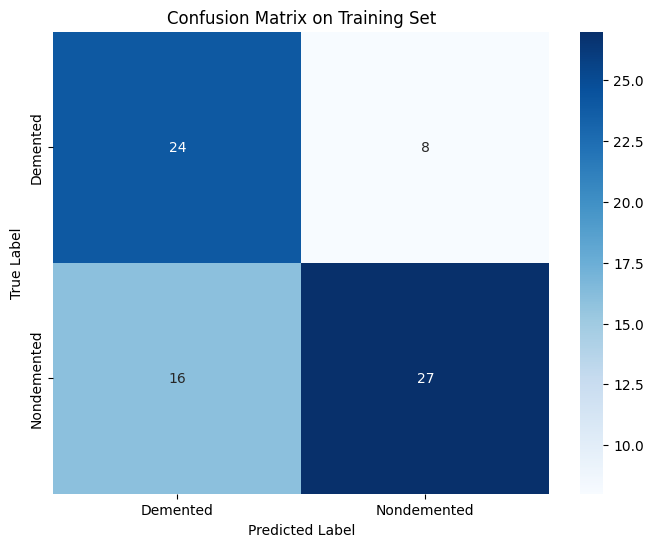

In [47]:
# Test the model on the separate test set
y_pred_test = rf_classifier_correlation.predict(X_test[selected_features_correlation])

# Calculate accuracy, precision, recall, and F1-score on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Compute confusion matrix on the training set
conf_matrix_corr_test = confusion_matrix(y_test, y_pred_test)

# Print results on the test set
print("\nResults on Test Set:")
print("Accuracy on Test Set:", accuracy_test)
print("Precision on Test Set:", precision_test)
print("Recall on Test Set:", recall_test)
print("F1-score on Test Set:", f1_test)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_corr_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Demented', 'Nondemented'], yticklabels=['Demented', 'Nondemented'])
plt.title('Confusion Matrix on Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### COMPARISON OF ACCURACY, F1 SCORE, PRECISION AND RECALL

C:\Users\HP\AppData\Local\Temp\ipykernel_11992\2640059440.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Accuracy', data=metrics_df, palette='Blues')


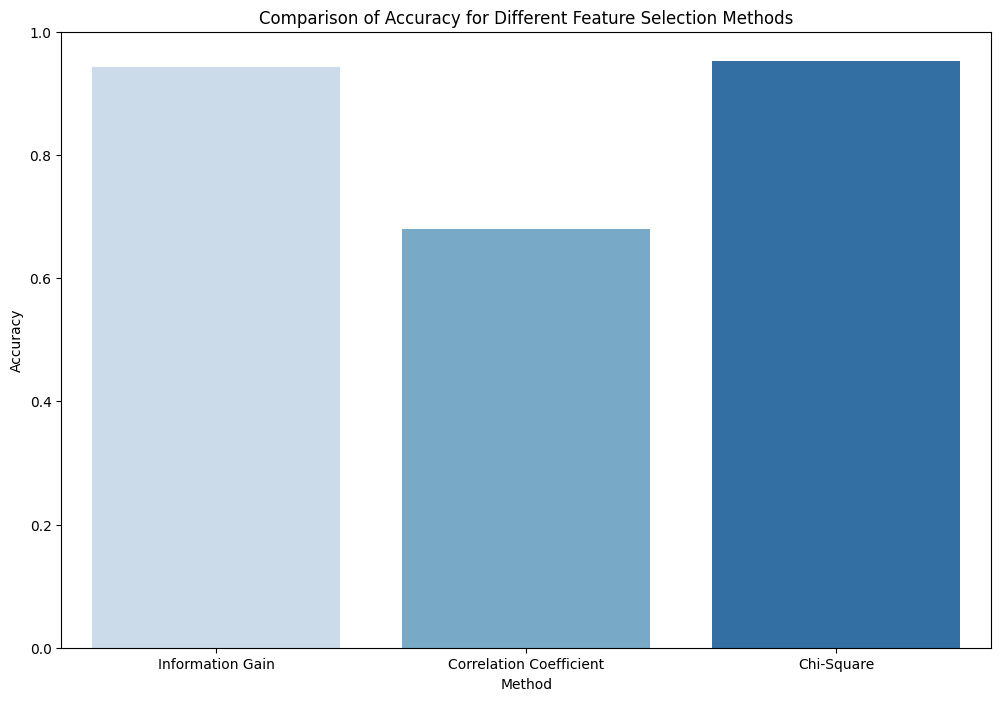

C:\Users\HP\AppData\Local\Temp\ipykernel_11992\2640059440.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Precision', data=metrics_df, palette='Greens')


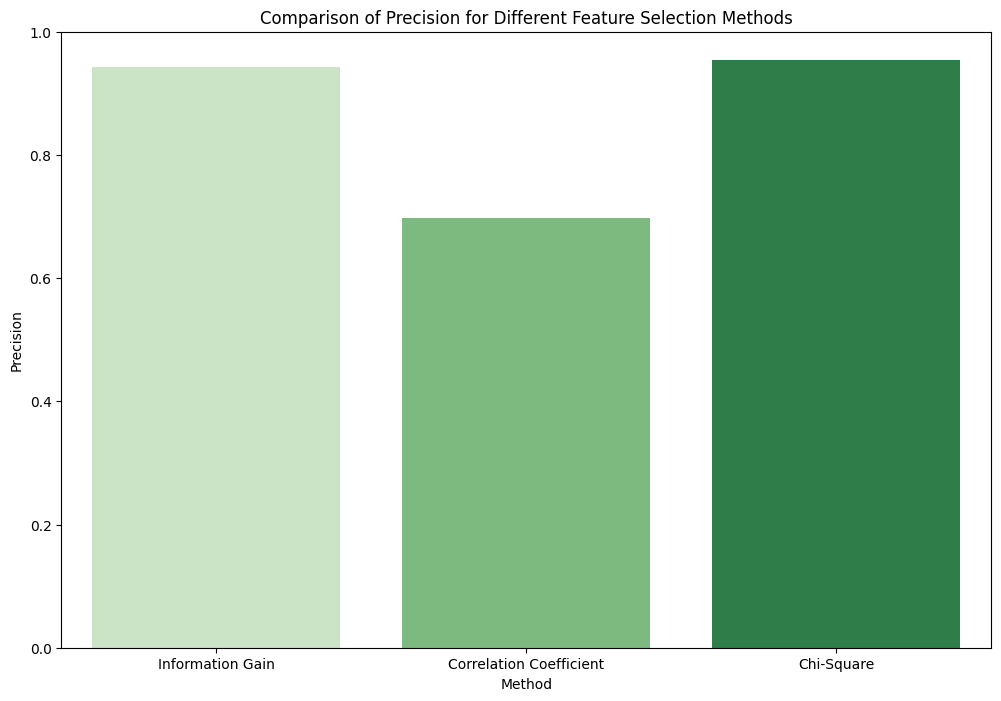

C:\Users\HP\AppData\Local\Temp\ipykernel_11992\2640059440.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Recall', data=metrics_df, palette='Oranges')


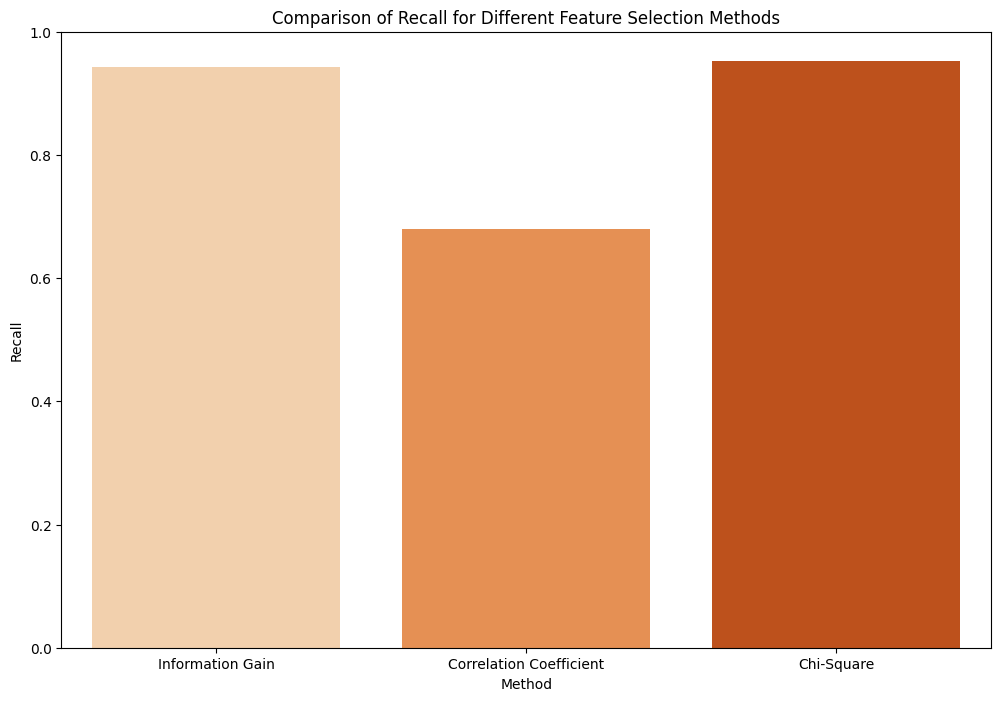

C:\Users\HP\AppData\Local\Temp\ipykernel_11992\2640059440.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='F1-score', data=metrics_df, palette='Reds')


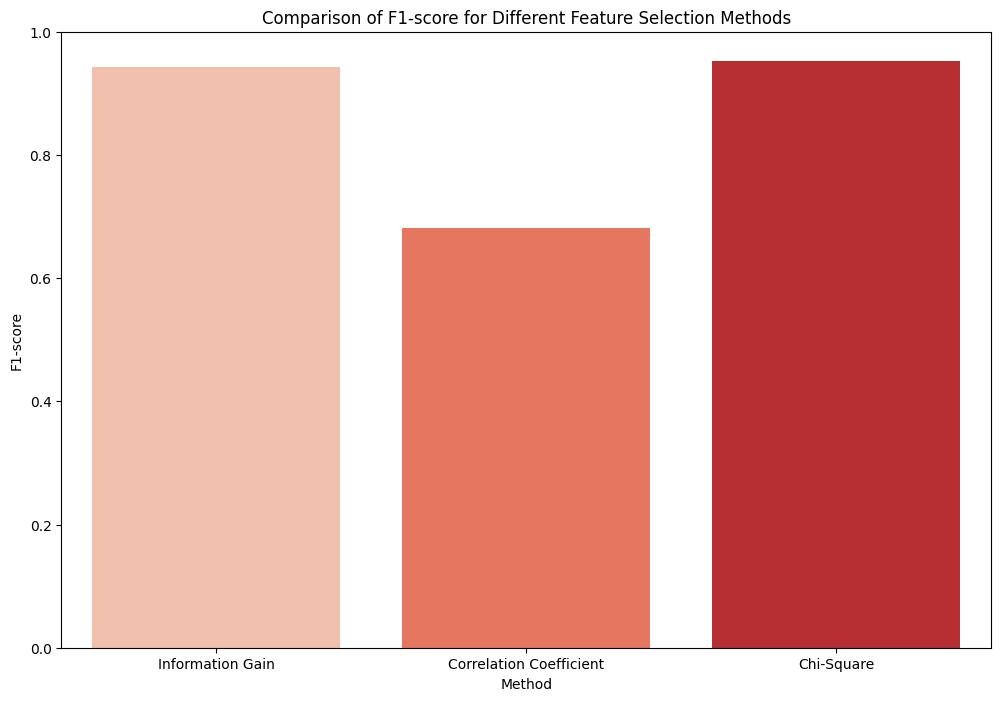

In [48]:
# Store the metrics in a DataFrame
metrics_df = pd.DataFrame({
    'Method': ['Information Gain', 'Correlation Coefficient', 'Chi-Square'],
    'Accuracy': [accuracy_info_gain, accuracy_test, accuracy_chi2],
    'Precision': [precision_info_gain, precision_test, precision_chi2],
    'Recall': [recall_info_gain, recall_test, recall_chi2],
    'F1-score': [f1_info_gain, f1_test, f1_chi2]
})

# Plot the metrics using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Method', y='Accuracy', data=metrics_df, palette='Blues')
plt.title('Comparison of Accuracy for Different Feature Selection Methods')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Method', y='Precision', data=metrics_df, palette='Greens')
plt.title('Comparison of Precision for Different Feature Selection Methods')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Method', y='Recall', data=metrics_df, palette='Oranges')
plt.title('Comparison of Recall for Different Feature Selection Methods')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Method', y='F1-score', data=metrics_df, palette='Reds')
plt.title('Comparison of F1-score for Different Feature Selection Methods')
plt.ylim(0, 1)
plt.show()